In [1]:
import sys,os
sys.path.append("../")
import random

from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from utils.plots import visualize_uncertainty, save_fig
from utils.misc import gen_data
from utils.loss import AleatoricLoss
from utils.metrics import mpiw,picp
from model_utils.mlp import MLPNet
from uncertainty.mc_dropout_regression import mc_dropout_eval
from uncertainty.deep_ensemble_regression import deep_ensemble_eval,EnsembleRegressionModel

/share/home/shiqing/miniconda3/envs/yym/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
models_path = ["../saved_models/regression/deterministic/2023_12_26_14_26_10/mlp.pth",
               "../saved_models/regression/deterministic/2023_12_26_14_29_19/mlp.pth",
               "../saved_models/regression/deterministic/2023_12_26_14_32_20/mlp.pth",
               "../saved_models/regression/deterministic/2023_12_26_14_38_43/mlp.pth",
               "../saved_models/regression/deterministic/2023_12_26_14_43_42/mlp.pth",
              ]
device = "cuda:0"
net = EnsembleRegressionModel(models_path,device)

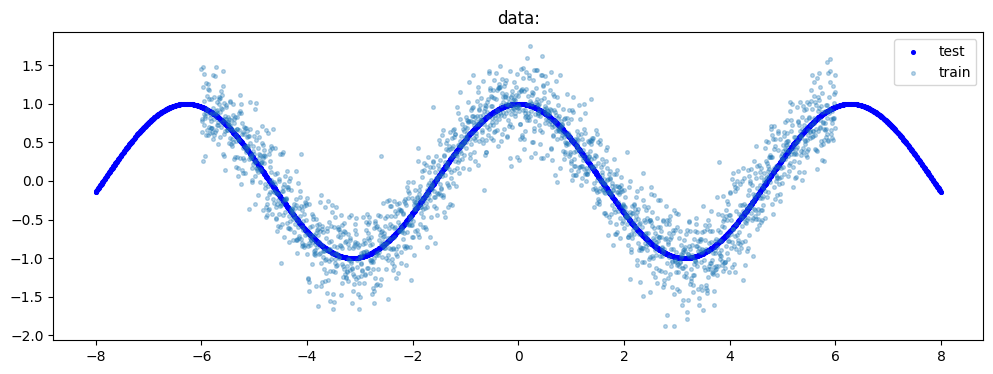

In [9]:
MEAN_FUN = np.cos
x_train, y_train, x_test, y_test = gen_data(mean_fun=MEAN_FUN,std_const=0.3,train_abs=6,test_abs=8,occlude=False, hetero=False)

In [10]:
preds,preds_mean,au,eu = deep_ensemble_eval(net,x_test.to(device))
print(f"picp:{picp(preds,y_test.numpy())[0]:.2f}")
print(f"mpiw:{mpiw(preds,y_test.numpy()):.2f}")

picp:0.29
mpiw:0.14


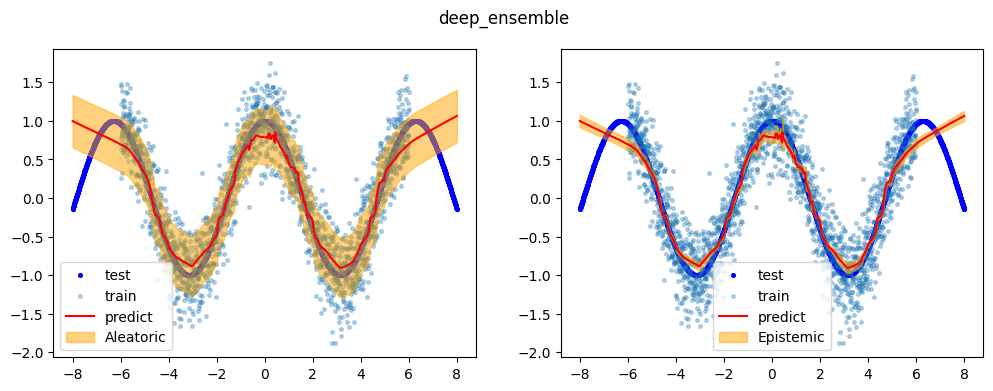

In [11]:
fig_title="deep_ensemble"
fig = visualize_uncertainty(fig_title,preds_mean,au,eu, x_train, y_train, x_test, y_test )
save_fig(fig,"../results/deep_ensemble_regression/","homo.jpg")